# 1. Clean Data

## 1.1 Read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime

# ******* Usser Input ********
di = "/Users/zxz1997/Desktop/AlphaStudio Challenge"
folder = 'Spendings'

In [2]:
os.chdir(di + '/' + folder)
sp = pd.read_csv('res_purchase_2014.csv')
sp.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890,NACAS,7/30/2013 0:00,7/31/2013 0:00,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,7/30/2013 0:00,7/31/2013 0:00,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,7/29/2013 0:00,7/31/2013 0:00,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,7/30/2013 0:00,7/31/2013 0:00,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,7/30/2013 0:00,7/31/2013 0:00,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [3]:
sp.tail()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
442452,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,992,TOTAL VALVE SYSTEMS,6/20/2014 0:00,6/23/2014 0:00,HARDWARE EQUIPMENT AND SUPPLIES
442453,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,2415,PRYOR WASTE & RECYCLING L,6/20/2014 0:00,6/23/2014 0:00,"UTILITIES - ELECTRIC,GAS,WATER,SANITARY"
442454,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,177.5,ACCURATE ENVIROMENTAL LAB,6/20/2014 0:00,6/23/2014 0:00,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED
442455,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,32457,RED BUD SERVICE INC,6/19/2014 0:00,6/23/2014 0:00,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED
442456,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,4714.07,WARRENCAT CREDIT DEPT,6/20/2014 0:00,6/23/2014 0:00,MISCELLANEOUS AND SPECIALTY RETAIL STORES


## 1.2 Check Data

* Note that there are enties in column "Vendor" containing number

In [4]:
# check column "Vendor"
vendor = 'SEARS.COM'
def f(x):
    if x[:len(vendor)+1] == vendor:
        return x
    else:
        return x[len(vendor)+1 :]
tmp = sp['Vendor'].apply(lambda x: f(x))
tmp.head()

0        
1    OTEL
2    9300
3    0137
4    RECT
Name: Vendor, dtype: object

* Aware of the "mixed types" warnings in the previous cell, and other commonly notable data type like datetime.

In [5]:
# check data types
sp.dtypes

Year-Month                       int64
Agency Number                    int64
Agency Name                     object
Cardholder Last Name            object
Cardholder First Initial        object
Description                     object
Amount                          object
Vendor                          object
Transaction Date                object
Posted Date                     object
Merchant Category Code (MCC)    object
dtype: object

* Note that data type in "Year-Month" is integer (should be datetime) and "Amount" is object/string (should be float). To be more precise, "Agency Number" should be object to establish better identity.

In [6]:
# check total col & row number
sp.shape

(442457, 11)

In [7]:
# check statistics
sp.describe(include = 'all')

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
count,442457.000000,442457.000000,442457,442457,442457,442457,442457.0,442457,442457,442457,442457
unique,NaN,NaN,124,3911,38,88734,112392.0,86727,392,258,435
top,NaN,NaN,OKLAHOMA STATE UNIVERSITY,JOURNEY HOUSE TRAVEL INC,J,GENERAL PURCHASE,20.0,STAPLES,9/11/2013 0:00,1/13/2014 0:00,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."
freq,NaN,NaN,115995,10137,55031,247186,11562.0,14842,2122,3256,24860
mean,201089.938457,42785.854897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,7359.607965,33378.498815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-999.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,201309.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,201401.000000,47700.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,201404.000000,76000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# further the unique number of "Agency Number"
print("Number of unique Agency Number: ", len(sp['Agency Number'].unique()))

Number of unique Agency Number:  116


* Note that the unique number of "Agency Number" cannot match with that of "Agency Name".

In [9]:
# check the 2 column containing Agency indentity
flag= True
for n in sp['Agency Number'].unique():
    tmp = sp[['Agency Number', 'Agency Name']][sp['Agency Number'] == n]
    if len(tmp['Agency Name'].unique()) > 1:
        #print("\nAgency Number: " + str(n) + " is representing multiple Agency Name as following: ")
        #print(tmp['Agency Name'].unique())
        flag = False
if flag: print("For each Number, there's only one Name.")
else: print("For each Number, there are more than one Names.")

For each Number, there are more than one Names.


In [10]:
flag = True
for n in sp['Agency Name'].unique():
    tmp = sp[['Agency Number', 'Agency Name']][sp['Agency Name'] == n]
    if len(tmp['Agency Number'].unique()) > 1:
        print("\nAgency Name: " + str(n) + " is representing multiple Agency Number as following: ")
        print(tmp['Agency Number'].unique())
        flag = False
if flag: print("For each Name, there's only one Number.")
else: print("For each Name, there are more than one Numbers.")

For each Name, there's only one Number.


* The mininum of the col "Year-Month" does not make sense.
    * the column "Year-Month" might be missing and invalid, and we should find an alternative data to replace it

In [11]:
# check the 3 columns containing datetime
sp[['Year-Month', 'Transaction Date', 'Posted Date']][sp['Year-Month'] == sp['Year-Month'][0]][-10:]

,Year-Month,Transaction Date,Posted Date
318990,201307,6/30/2013 0:00,7/5/2013 0:00
324682,201307,5/23/2013 0:00,7/9/2013 0:00
326933,201307,7/17/2013 0:00,7/29/2013 0:00
328963,201307,7/17/2013 0:00,7/29/2013 0:00
405321,201307,5/22/2013 0:00,7/9/2013 0:00
409799,201307,7/9/2013 0:00,7/23/2013 0:00
439184,201307,7/8/2013 0:00,7/30/2013 0:00
439200,201307,5/27/2013 0:00,7/3/2013 0:00
439201,201307,5/27/2013 0:00,7/3/2013 0:00
439203,201307,5/27/2013 0:00,7/3/2013 0:00


* Note that the month of "Year-Month" is matched with that of "Posted Date". Thus below we check the validation of "Posted Date" to determine whether we can use "Posted Date" as the replacement of "Year-Month".

In [12]:
print("The min 'Posted Date' is %s" % sp['Posted Date'].min())
print("The max 'Posted Date' is %s" % sp['Posted Date'].max())

The min 'Posted Date' is 1/10/2014 0:00
The max 'Posted Date' is 9/9/2013 0:00


* Combining the info from sp.describe, we can confirm that the date in the column "Posted Date" is valid.

## 1.3 Observation and Solution

1. Column "Vendor"
    * [obs] contains entries that represent one single vendor but having different suffix
    * [sol] remove the suffix when we want to analyze desired vendor name

2. Column "Year-Month"
    * [obs] contains integer-type data and includes invalid minimum data -999
    * [sol] remove this column and use column "Posted Date" as the replacement

3. Column "Amount"
    * [obs] contains string-type data, which may resulted from impropriate input or read
    * [sol] convert into float

4. Column "Agency Number"
    * [obs] there exit numbers that represent multiple different Agency Name
    * [sol] remove this column and use column "Agency Name" since each of it is unique

## 1.4 Clean Process

### 1.4.1 Remove "Year-Month" and "Agency Number"

In [13]:
# create new dataFrame called clean
clean = sp.drop(['Year-Month', 'Agency Number'], axis = 1)
clean.loc[:,'Posted Date'] = pd.to_datetime(clean.loc[:,'Posted Date'], format='%m/%d/%Y %H:%M')
clean.loc[:,'Transaction Date'] = pd.to_datetime(clean.loc[:,'Transaction Date'], format='%m/%d/%Y %H:%M')
clean.head()

,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON
2,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS"
4,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


### 1.4.2 Transform Datatype in Column "Amount"

Extract float using regular expression '(\d*\.?\d+)'

In [14]:
clean.loc[:,'Amount'] = clean.loc[:,'Amount'].astype(str).str.extract('(\d*\.?\d+)', expand=False).astype(float)
clean['Amount'].dtypes

dtype('float64')

# 2. Answer Questions

## Q1. What is the total amount of spending captured in this dataset? 

In [15]:
total_sp = clean['Amount'].sum()
print("The total amount of spending captured in this dataset is : $%0.2f" % total_sp)

The total amount of spending captured in this dataset is : $195165873.33


## Q2. How much was spent at WW GRAINGER? 

In [16]:
# convert all characters to uppercase first
clean.loc[:,'Vendor'] = clean['Vendor'].str.upper()

In [17]:
tmp = clean['Vendor'].str.contains('WW GRAINGER')
sp_WW_GRAINGER = clean.loc[tmp]['Amount'].sum()
print("The total amount of spending at WW GRAINGER is : $%0.2f" % sp_WW_GRAINGER)

The total amount of spending at WW GRAINGER is : $5360849.30


## Q3. How much was spent at WM SUPERCENTER? 

In [18]:
tmp = clean['Vendor'].str.contains('WM SUPERCENTER')
sp_WM_SUPERCENTER = clean.loc[tmp]['Amount'].sum()
print("The total amount of spending at WM SUPERCENTER is : $%0.2f" % sp_WM_SUPERCENTER)

The total amount of spending at WM SUPERCENTER is : $157457.46


## Q3. What is the standard deviation of the total monthly spending in the dataset? 

In [19]:
# further drop unnecessary columns
date_idx = clean.drop(['Agency Name', 'Cardholder Last Name', 'Cardholder First Initial', 
                       'Description' , 'Vendor', 'Posted Date', 'Merchant Category Code (MCC)'], axis = 1)

In [20]:
# set "Transaction Date" as new index
date_idx.set_index('Transaction Date', inplace=True)

In [21]:
# resample the dataset into monthly-base and sum up monthly spendings
mth_idx = date_idx.resample('1M').sum()
mth_idx

,Amount
Transaction Date,
2013-04-30,41.82
2013-05-31,24936.20
2013-06-30,1709727.13
2013-07-31,17287069.00
2013-08-31,18977628.79
2013-09-30,15663496.64
2013-10-31,18303060.12
2013-11-30,12879701.76
2013-12-31,12473203.02


Note that in Apr, May, and Jun of 2013, the monthly spendings are not in the same magnitude as the rest, in this case we may consider the three points as outliers and thus ignore them.

In [24]:
# sample standard deviation -- normalize by N-1
print("The standard deviation of the total monthly spending in the dataset is : %0.2f" % 
      mth_idx['Amount'][3:].std() + ' with removal of outliers')
print("(%0.2f" % mth_idx['Amount'].std() + ' with outliers.)')

The standard deviation of the total monthly spending in the dataset is : 1972504.61 with removal of outliers
(6678193.91 with outliers.)


## Q5. Please describe the process you would follow to build a model on this dataset to make predictions about the stock market. Please note this is a hypothetical only - there is no need to build an actual model. 

### Q5.1 Logic Behind

On the one hand, the stock market is a reflection of the economic conditions of an economy. If an economy is going through a recession, then the output will be decreasing, and most firms should be experiencing decreased profitability, which will result in decreasing in corresponding stock prices.

On the other hand, the credit card transactions records can also indicate the status of an economy. In countries or areas like US where the penetration rate of credit card is high and personal consumer spendings account for a large part of the GDP, the credit card transaction data is a good indicator for the health status of the economy.

Therefore, by analyzing the trendings of credit card transactions, we can have an evidential forecast about the movements of the economy and thus estimate the stock market accordingly. In other words, there is a positive correlation between the quantity of credit card transactions and stock market movement. 

### Q5.2 Dataset

Except for the data under consideration, we will introduce historical weekly dummy data of S&P500 index -- 1 if the weekly return is positive, 0 otherwise.

### Q5.3 Assumptions and Model

The total period of this transaction data is about 1 year, which will be our lookback period. As for the holding period/prediction period, it will be one week. 

The transaction data gives us a general idea about how the market movement is (up or down), but it hardly tells us the exact price of one stock/index since there is no causality between them in principle. So we will only predict whether the holding period return is positive or not.

Markov Process model is prevalently used to predict the stock price. Further, here we consider the Hidden Markov Model (HMM), which mimic the reality better by assuming that There are underlying ‘hidden’ states which drive the stock prices and the transition probabilities are unknown.

Since we 'normalize' the weekly return of S&P 500 to 0 or 1, the emission probability will equal to the possibility of positive weekly return for the holding period.

### Q5.4 Process

#### Q5.4.1 Clean Data

1. drop irrelevant data

Based on the pd.dataFrame `clean`, which have been partially cleaned above, we further drop `'Posted Date'` and `'Merchant Category Code (MCC)'` columns since they are irrelevant to our concerns (no causalities).
    
2. create feature

Note that `'Cardholder Last Name'` plus	`'Cardholder First Initial'` will uniquely represent a cardholder and it is a causal factor, we will create a new column named `'Cardholder'` based on the concatenated string of these two columns, and drop these two columns.

3. create dummies

After the above two processes, we get a newly cleaned pd.dataFrame containing `'Agency Name'`, `'Cardholder'`, `'Description'`, `'Amount'`, `'Vendor'`, `'Transaction Date'`. Except for `'Amount'`, and `'Transaction Date'`, we will convert the rest into dummy variables. These dummy variables, together with `'Amount'`, will be features in our model.

4. resample to the weekly transaction

First reindex based on the `'Transaction Date'`, then use `dataFrame.resample('B').sum()` to transform into business daily data.

5. split the dataset

We split the dataset obtained from step 4 into 7:3, where 70% is `training_data` while 30% is the `test_data`.

#### Q5.4.2 Training and Testing

**Training**(here we will train s = 2,3,4,5, separately)

1. Set randomly the number of states to s;
2. Randomly set the initial state probability 𝑃0 and transition probability 𝐴;
3. Run the Baum-Welch algorithm using these initial condition to calculate suboptimal parameters 𝜆.

**Testing**
    
1. Select a window size `w`;
2. Calculate the 𝑃(O/𝜆) or –log(𝑃(O/𝜆)) for all the sub-sequences, where O stands for our features mentioned above in the period of `w`;
3. Identify the sub-sequence whose log-likelihood of its `w` previous observations is the closest to the sub-sequence whose next day’s price is to be predicted;
4. Use the differential change.


#### Q5.4.3 Model Selection

##### I. Learning Model Order
    
 **Bayesian Information Criterion**

By using Bayesian Information Criterion, the complexity of the model can be penalized giving the optimal number of states for a stock:

    𝐵𝐼𝐶=−2ln(𝐿)+𝑝×𝑙𝑛(𝑇)

where 𝐿 is the likelihood function for the model, 𝑇 is the number of observation points and 𝑝 is the estimated parameters in the model:
    
    𝑝=𝑁^2+2𝑁−1

The lower the BIC, the better the model. But our object is the predictive performance of the model, thus more attention will be given to the cross-validation as below and will not just stick to this singular criterion.
    
##### II. Assess Predictive Performance
**apply k-fold cross validation** we use k = 10 here

1. Divide test set into k random subsets;
2. The test set is tested using the classifier trained on the remaining k-1;
3. Do test on all of the other sets and average the percentages;
4. Calculate the optimal hyperparameter values through grid search.


#### Q5.4.4 Reflections and Prediction

After getting the hyperparameter, we calculate the performance metrics by inserting test data into the trained model, which will show us the optimal model based on Receiver Operating Characteristic Area Under the Curve.

If the accuracy rate is not high enough, after ranking models by cross-validation, we will double-rank using the BIC as model-selection criterion and thus find the second best from the initial ranking. Furthermore, we can generate more different models to the training process and do the selection again, in order to raise the test-data accuracy.

Note the scale of the transaction data, we did not leave any data for validation purpose (known as validation data). This may cause our models to perform best on the test data but poorly on general data. This can be improved if we can access a larger scale of dataset.

Finally, when new transaction data come out, we can forward them into the selected optimal model and make prediction -- likelihood of whether suffering weekly loss or gaining profits.

## Q6. What biases might this dataset have if you tried to use it to model equities? 

1. Delayed Effect:

    - It takes some time for the main participants in the market to get full information about the status of economics and thus there is always some delayings of illustration in the stock market. Additionally, this kind of delaying is different for different causality under different market condition. There is a high possibility that the model we build only captured the average level of delaying, which will cause the prediction biased.


2. Sampling Bias:

    - The dataset only contains the transaction data of employees of one state in the US. Since different states may have different cultures and hence the shopping habits/patterns, using the state-level data to predict the whole country thus is biased. 
    - Also, S&P 500 includes companies whose main (revenue-generating) business may be not from the US even they are American companies. Using US transaction data to predict conditions in other countries is another bias caused by this inappropriate sample.
    - As we mentioned in the logic section, the penetration rate of credit card is high and personal consumer spendings account for a large part of the GDP in the US. But if it is the case in other countries, especially developing countries where penetration rate of credit card is low and stake of personal consumer spendings is just a small part of GDP, our logic behind will be invalid.
    
    
3. Validation Bias:

    - As we mentioned in Q5.4.4, the model is biased to make the test data perform well, because of lacking validation data.
    

4. Survival Bias:

    - Without more detailed data, we can not make sure there is no selection process. Chances are that selected employees are rich enough and the elasticity to the economic condition is low.

## Q7. (Optional) Do you have any other observations about this dataset? 

### 1. Customers

In [25]:
clean['Cardholder'] = clean['Cardholder Last Name'].str.cat(clean['Cardholder First Initial'],sep=' ')
print("The number of unique Cardholder is %i." % len(clean['Cardholder'].unique()))

The number of unique Cardholder is 5213.


[Text(0,0.5,'Total Spendings'),
 Text(0.5,0,'Cardholder Name'),
 Text(0.5,1,'Total spendings by Cardholder')]

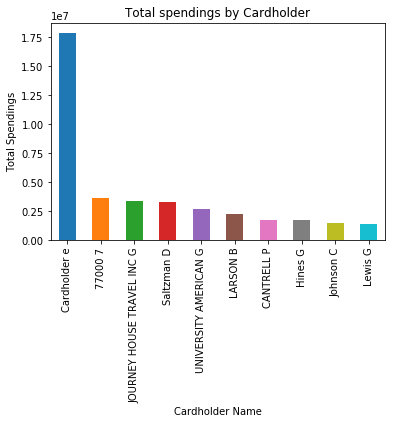

In [26]:
axis = clean.groupby(['Cardholder'])['Amount'].sum().sort_values(ascending=False)[:10].plot.bar()
axis.set(xlabel="Cardholder Name", ylabel="Total Spendings", title = "Total spendings by Cardholder")

It is likely that 'Cardholder e' is the largest company in Oklahoma State.

### 2. Agency

In [27]:
print("The number of unique Agency is %i." % len(clean['Agency Name'].unique()))

The number of unique Agency is 124.


[Text(0,0.5,'Total Spendings'),
 Text(0.5,0,'Agency Name'),
 Text(0.5,1,'Total Proxy Amount by Agency')]

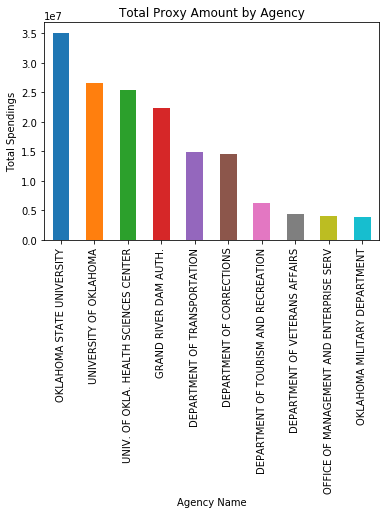

In [28]:
axis = clean.groupby(['Agency Name'])['Amount'].sum().sort_values(ascending=False)[:10].plot.bar()
axis.set(xlabel="Agency Name", ylabel="Total Spendings", title = "Total Proxy Amount by Agency")

[Text(0,0.5,'Total Numbers'),
 Text(0.5,0,'Agency Name'),
 Text(0.5,1,'Total numbers of tradings')]

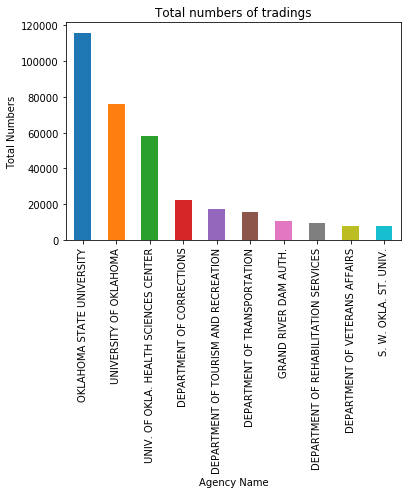

In [29]:
axis = clean.groupby(['Agency Name'])['Amount'].count().sort_values(ascending=False)[:10].plot.bar()
axis.set(xlabel="Agency Name", ylabel="Total Numbers", title = "Total numbers of tradings")

Universities dominate the agent market.